In [1]:
# Import necessary libraries
import pandas as pd
import datetime 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data Preparation as per the companies.
df = pd.read_csv('20_Companies_cleaner.csv', index_col='Unnamed: 0')
df['Date'] = df["Date"].apply(lambda x:
                             datetime.datetime.strptime(x, "%Y-%m-%d"))
companies = df.groupby('Code')
company_data = companies.get_group('EQTY')
company_data = company_data.drop(columns=['Name', 'Code'])
company_data.set_index('Date', drop=True, inplace=True)


In [3]:
#Employ Feature engineering
#Extract relevant features from the data, that is, percentage change, Moving average, Relative strength index, volume indicators
#Let' start with SMA (Average price over a given period of time, i've used 20 days). Replace the NaN with the mean of SMA-20
company_data['SMA-20'] = company_data['Day Price'].rolling(window=20).mean()
company_data['SMA-20']= company_data['SMA-20'].fillna(company_data['SMA-20'].mean())

In [4]:
#Commodity channel index determines whether a stock is overbought or oversold
#Assesses relationship between an asset price, moving average and derivations from the average
#I use 20 days as the number of periods
typical_price = (company_data['Day High']+ company_data['Day Low']+company_data['Day Price'])/3
ma = typical_price/20
mean_deviation = (typical_price-ma)/20
company_data['CCI'] = (typical_price-ma)/(0.015*mean_deviation)

In [5]:
#Rate-of-change measures the percentage change in price between the current  price and the price a certain number
#of period ago
company_data['ROC'] = ((company_data['Day Price']-company_data['Day Price'].shift(10))/(company_data['Day Price'].shift(10)))*100
#Replace NaN with the mean of ROC 
company_data['ROC']= company_data['ROC'].fillna(company_data['ROC'].mean())

In [6]:
#For relative Strength index- measures RSI compares the size of recent gains to recent losses,
#Reveals the strength or weakness of a price trend
company_data['Gain'] = company_data['Change'].apply(lambda x: x if x>0 else 0)
company_data['Loss'] = company_data['Change'].apply(lambda x: abs(x) if x<0 else 0)
relative_strength = company_data['Gain'].mean()/company_data['Loss'].mean()
company_data['RSI'] = 100 - (100/(1+relative_strength))
company_data = company_data.dropna()
company_data

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Volume,Adjusted Price,SMA-20,CCI,ROC,Gain,Loss,RSI
Date,,,,,,,,,,,,,,,
2022-01-03,39.00,55.0,51.00,54.50,52.75,52.75,0.00,4702000.0,0.0,50.37497,1333.333333,-1.693442,0.0,0.00,42.179072
2022-01-04,39.00,55.0,53.00,53.50,53.25,52.75,0.50,2160700.0,0.0,50.37497,1333.333333,-1.693442,0.5,0.00,42.179072
2022-01-05,39.00,55.0,53.00,53.25,53.00,53.25,-0.25,658900.0,0.0,50.37497,1333.333333,-1.693442,0.0,0.25,42.179072
2022-01-06,39.00,55.0,53.00,53.25,53.00,53.00,0.00,243200.0,0.0,50.37497,1333.333333,-1.693442,0.0,0.00,42.179072
2022-01-07,39.00,55.0,53.00,53.25,53.00,53.00,0.00,686300.0,0.0,50.37497,1333.333333,-1.693442,0.0,0.00,42.179072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,40.25,55.0,41.75,43.95,42.00,42.00,0.00,4957000.0,0.0,45.94250,1333.333333,-6.562848,0.0,0.00,42.179072
2022-05-26,40.25,55.0,42.00,44.00,42.90,42.00,0.90,335800.0,0.0,45.59000,1333.333333,-3.811659,0.9,0.00,42.179072
2022-05-27,40.25,55.0,43.50,45.00,44.00,42.90,1.10,67000.0,0.0,45.31750,1333.333333,-3.296703,1.1,0.00,42.179072


In [7]:
#Label buy(1) when current(Day Prices) is lower than previous day or they are equal
#Label sell(0) if current day price is higher than previous day
company_data['Decision'] = np.where(company_data['Change']>0,0,1) 
company_data

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Volume,Adjusted Price,SMA-20,CCI,ROC,Gain,Loss,RSI,Decision
Date,,,,,,,,,,,,,,,,
2022-01-03,39.00,55.0,51.00,54.50,52.75,52.75,0.00,4702000.0,0.0,50.37497,1333.333333,-1.693442,0.0,0.00,42.179072,1
2022-01-04,39.00,55.0,53.00,53.50,53.25,52.75,0.50,2160700.0,0.0,50.37497,1333.333333,-1.693442,0.5,0.00,42.179072,0
2022-01-05,39.00,55.0,53.00,53.25,53.00,53.25,-0.25,658900.0,0.0,50.37497,1333.333333,-1.693442,0.0,0.25,42.179072,1
2022-01-06,39.00,55.0,53.00,53.25,53.00,53.00,0.00,243200.0,0.0,50.37497,1333.333333,-1.693442,0.0,0.00,42.179072,1
2022-01-07,39.00,55.0,53.00,53.25,53.00,53.00,0.00,686300.0,0.0,50.37497,1333.333333,-1.693442,0.0,0.00,42.179072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,40.25,55.0,41.75,43.95,42.00,42.00,0.00,4957000.0,0.0,45.94250,1333.333333,-6.562848,0.0,0.00,42.179072,1
2022-05-26,40.25,55.0,42.00,44.00,42.90,42.00,0.90,335800.0,0.0,45.59000,1333.333333,-3.811659,0.9,0.00,42.179072,0
2022-05-27,40.25,55.0,43.50,45.00,44.00,42.90,1.10,67000.0,0.0,45.31750,1333.333333,-3.296703,1.1,0.00,42.179072,0


<Figure size 1200x600 with 0 Axes>

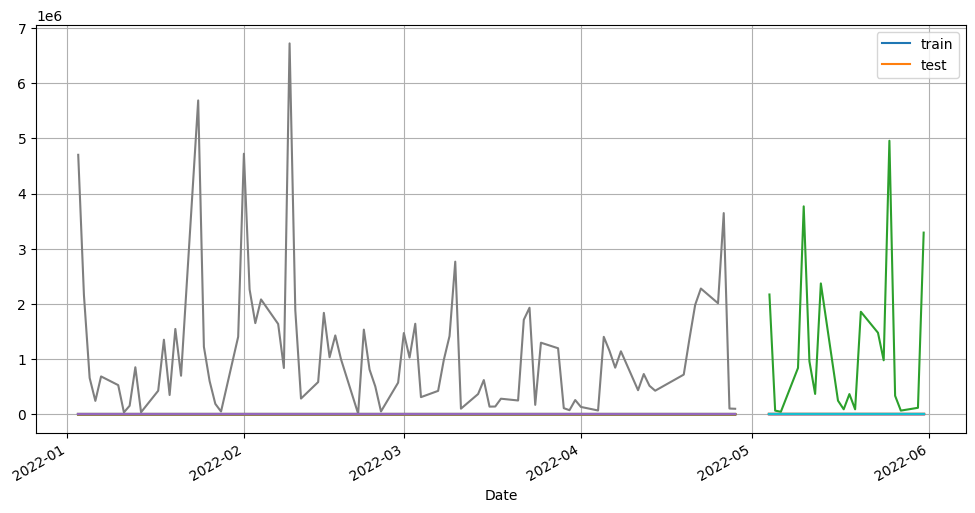

In [8]:
#Separate features from the label
y = company_data['Decision']
x= company_data.drop(columns='Decision')
train_len = round(0.8*len(x))
train_x = x[:train_len]
test_x = x[train_len:]
train_y = y[:train_len]
test_y = y[train_len:]
plt.figure(figsize=(12,6))
ax =train_x.plot(grid=True, figsize=(12,6))
test_x.plot(ax=ax,grid=True)
plt.legend(['train','test'])
plt.show()

In [9]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))#Scalling down the values
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.fit_transform(test_x)

In [10]:
#Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x_scaled, train_y)
model

LogisticRegression()

In [11]:
from sklearn import metrics
predictions = model.predict(test_x_scaled)
print('Accuracy score:')
print(metrics.accuracy_score(test_y, predictions))
print('Confusion Matrix:')
print (metrics.confusion_matrix(test_y, predictions))
print('Classification Report:')
print(metrics.classification_report(test_y, predictions))

Accuracy score:
0.9
Confusion Matrix:
[[ 7  1]
 [ 1 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



Text(20.72222222222222, 0.5, 'Actual')

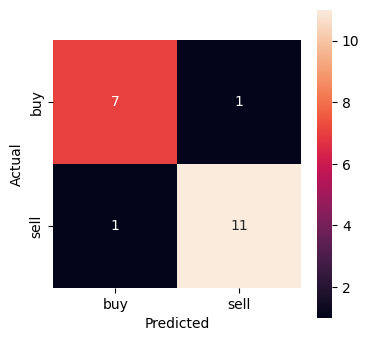

In [12]:
#Visualization of the confusion matrix
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(4, 4)) 
confusion_matrix = metrics.confusion_matrix(test_y, predictions) 
ax = sns.heatmap(confusion_matrix, annot=True, square=True, 
                 xticklabels=['buy', 'sell'], 
                 yticklabels=['buy', 'sell']) 
ax.set_xlabel('Predicted') 
ax.set_ylabel('Actual')

ROC Area Under Curve: 0.9791666666666666, meaning the model has almost a 98% chance of predicting correctly.


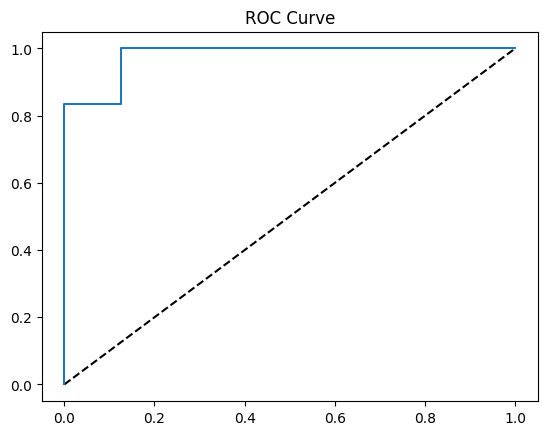

In [13]:
pred_prob_y = model.predict_proba(test_x_scaled)[:,1]
false_positive_rate, true_positive_rate,_ = metrics.roc_curve(test_y, pred_prob_y)
roc_auc= metrics.auc(false_positive_rate,true_positive_rate)
print('ROC Area Under Curve: '+str(roc_auc)+', meaning the model has almost a '+str(round(roc_auc*100))+'% chance of predicting correctly.')
plt.plot([0,1],[0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate)
plt.title('ROC Curve')
plt.show()